In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/mushrooms.csv')

In [4]:
X = pd.get_dummies(df.drop('class', axis=1), drop_first=True)

In [5]:
y = df['class']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1,
                                                    random_state=101)

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
param_grid = {'n_estimators': [50,100], 
              'learning_rate':[0.1, 0.05, 0.2],
              'max_depth': [3,4,5]}

In [11]:
gb_model = GradientBoostingClassifier()

In [12]:
grid = GridSearchCV(gb_model, param_grid)

In [13]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [14]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [16]:
predictions = grid.predict(X_test)

In [17]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [19]:
feat_import = grid.best_estimator_.feature_importances_

In [20]:
imp_feat = pd.DataFrame(index=X.columns,data=feat_import, columns=['Importance'])

In [28]:
imp_feat = imp_feat[imp_feat['Importance'] > 0.0005].sort_values('Importance')

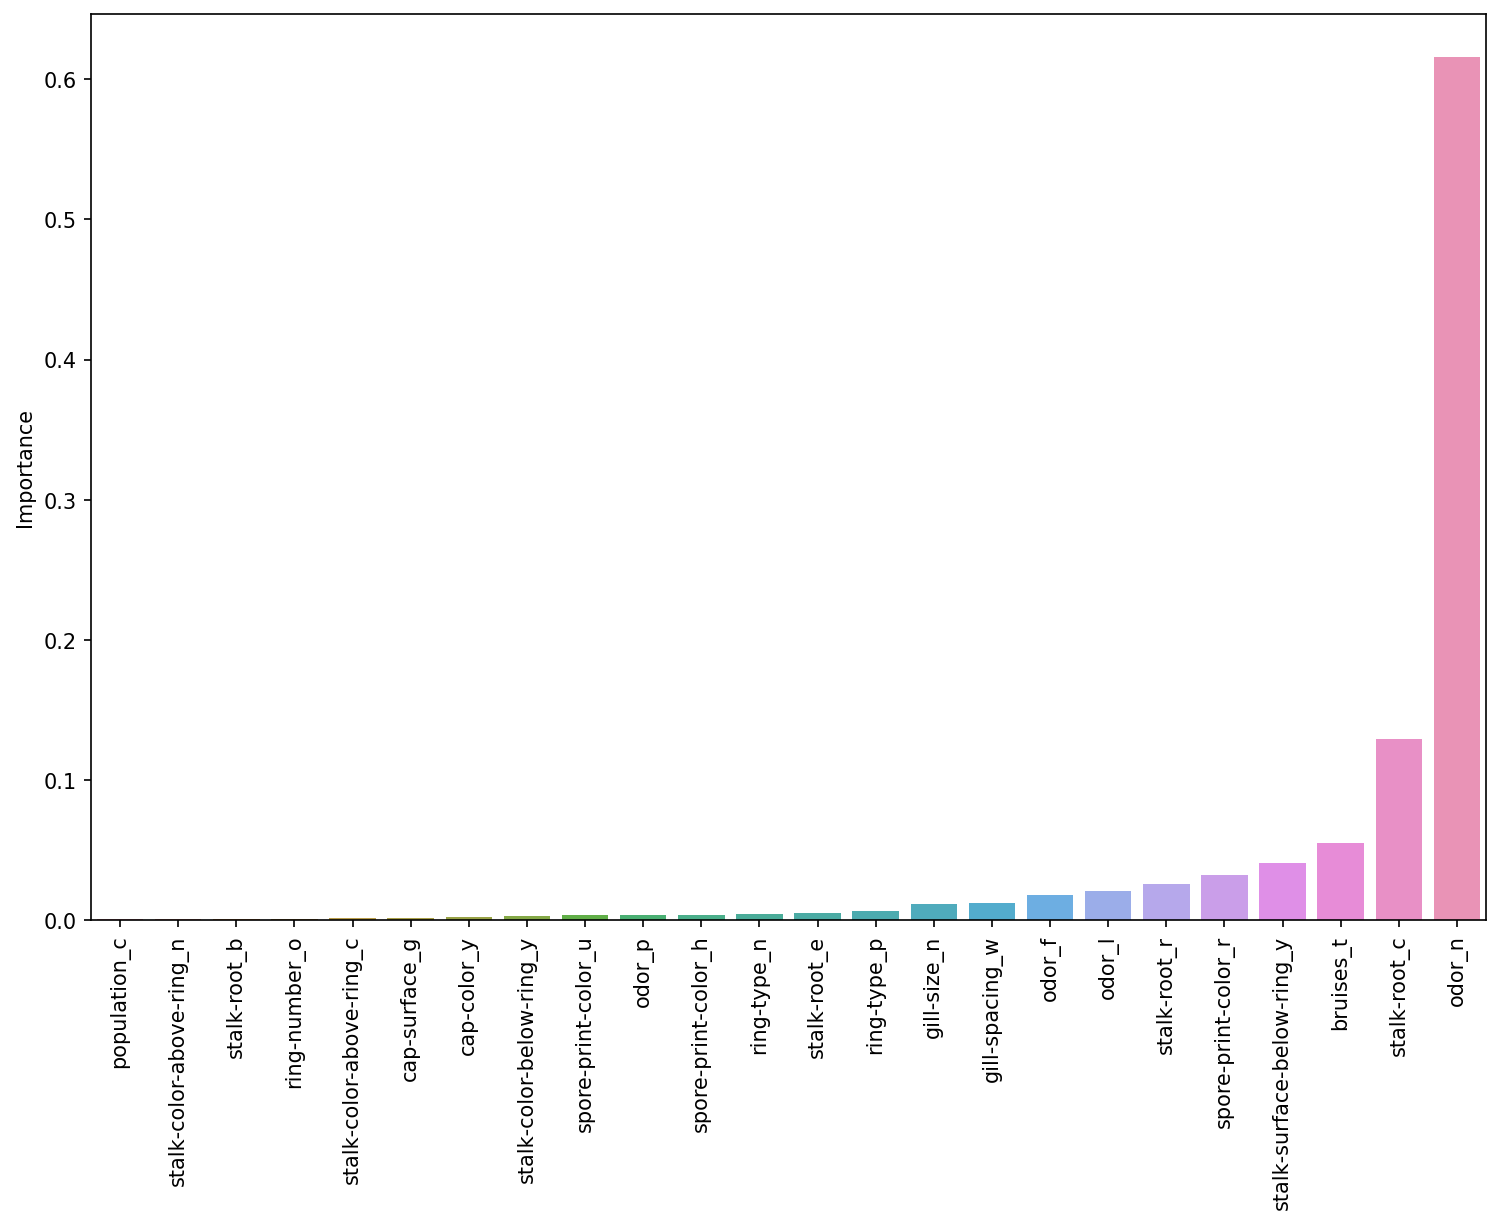

In [34]:
plt.figure(figsize=(12, 8), dpi=150)
sns.barplot(data=imp_feat, x=imp_feat.index, y='Importance')
plt.xticks(rotation=90);